In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
nTurn = 1
nx = 100
pipe_radius = 0.02*2.0**0.5

In [3]:
beam,lattice = impact.readInputFile('test.SF.in')
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

lattice=[lattice[0],lattice[2]]

betx = lattice[1].betx
NL_t = lattice[1].strength_t
NL_c = lattice[1].transverse_scale_c
lattice[1].n_sckick = 50
lattice[1].n_map = 5

reading ImpactZ input file (test.SF.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
testP = 0.0
sig = 0.01
k=0
q_m = beam.multi_charge.q_m[0]
pTest = []
for x in np.linspace(-0.01,0.01,nx):
    for y in np.linspace(-0.01,0.01,nx):
        if x**2+y**2<=sig**2 :
            k+=1
            pTest.append([x,0.0,y,0.0,0.0,0.0,q_m,0.0,k])            
            
pTest = np.array(pTest)
nptTest = len(pTest)

In [5]:
latticeTmp = [impact.getElem('loop'),impact.getElem('write_raw_ptcl')]
latticeTmp[0].turns=1
latticeTmp[-1].file_id = 111110
latticeTmp[-1].turn = 1
beam.n_particles = nptTest
impact.writeParticleData(pTest, ke, mass, freq)
beam.nCore_y = 1
beam.nCore_z = 1
impact.writeInputFile(beam,latticeTmp)
impact.run(beam,order=1)

0

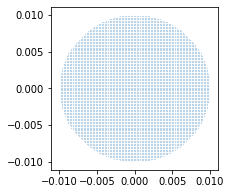

In [7]:
pData = impact.readParticleData(111110,ke,mass,freq)
plt.figure(figsize=(3,3))
plt.scatter(pData[:,0],pData[:,2],s=0.01)

In [ ]:
TBT = impact.getElem('TBT')
TBT.file_id = nTurn
lattice.insert(1,TBT)

TBT_integral = impact.getElem('TBT_integral')
TBT_integral.file_id = nTurn
TBT_integral.betx = betx
TBT_integral.alfx = 0.0
TBT_integral.strength_t = NL_t
TBT_integral.transverse_scale_c = NL_c
lattice.insert(2,TBT_integral)

if nTurn == 128:
    lattice[0].turns = nTurn
else:
    lattice[0].turns = int(nTurn/2)

for i in range(len(lattice)):
    if 'pipe_radius' in lattice[i].keys() and lattice[i].type!='dipole':
        lattice[i].pipe_radius = pipe_radius
        
lattice.append(impact.getElem('write_raw_ptcl'))
if nTurn == 128:
    lattice[-1].turn = nTurn
else:
    lattice[-1].turn = int(nTurn/2)

lattice[-1].file_id = -nTurn

In [ ]:
beam.distribution.distribution_type = 'ReadFile_binary'
if nTurn == 16:
    beam.distribution.file_id = 111110
else:
    beam.distribution.file_id = int(nTurn/2)
beam.nCore_y = 2
beam.nCore_z = 2
impact.writeInputFile(beam,lattice,'test.in.'+str(nTurn)+'.forward') 
impact.run(beam,order=1)

In [ ]:
with open('test.in.'+str(nTurn)+'.forward') as f:
    testIn=f.read()
print(testIn)